# Repelica of my R projects on Python

Daniel Wang

6/18/2021

I’d like to know what are the most common ingredients used in the this perfume data table. It has several steps:

## Step 1: Install all required packages and load data

In [9]:
import os
import pandas as pd
perfumeData = pd.read_csv("https://www.dropbox.com/s/wvzevr0z39uf44x/final_perfume_data.csv?dl=1", encoding='latin-1')

## Step 2: Data Cleaning!

Take your broom with me and let’s see if the data is clean or not!

After viewing the data, I spotted that in some rows, the value “note” is blank. For example:

In [10]:
perfumeData.loc[1494,:]

Name                                   Rose Flash Parfum Extrait
Brand                                                 Tauerville
Description     While we've never had trouble getting excited...
Notes                                                        NaN
Image URL      https://static.luckyscent.com/images/products/...
Name: 1494, dtype: object

Crap! It seems like the “notes” section is completely left blank! :-(

But then let’s whip our magic wand and clean it in 1 second with dropna function!

In [12]:
perfumeData_clean = perfumeData.dropna(0,'any')

## Step 3: Split the strings & Count Frequencies & Plot it!

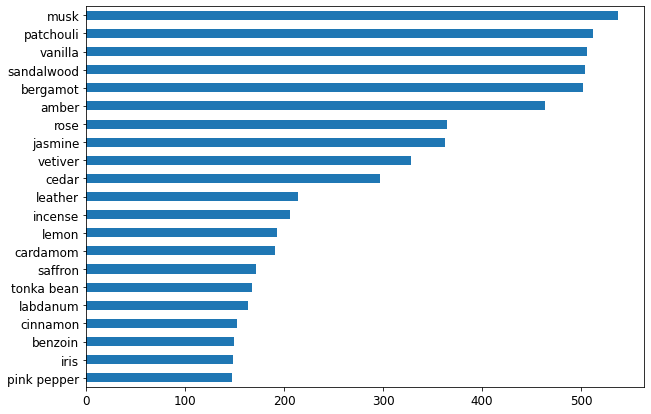

In [13]:
ingredientsFreq = perfumeData_clean.Notes.str.split(pat=", ", expand = True).stack().str.lower().str.strip().value_counts()
ingredientsFreq[0:21].plot(kind="barh", fontsize=12, figsize=(10,7)).invert_yaxis()



The reason why the output is a bit different here is because of word counting methodologies are different between Pandas and smappR **(What is smappR? See the R markdown and knitted HTML file that I sent to you earlier!)**

After carefully looking at the result, I found Panda counts strings like "rose" and "bulgarian rose" as two unique strings, thus it outputs 1 time "rose" and 1 time "bulgarian rose"  while word.frequencies in smappR counts them as 2 occourances under string "rose".

## Step 4: Using list comprehension for an ingredient palette

In [ ]:
from itertools import chain
from collections import Counter
IngList = perfumeData_clean.Notes.str.split(pat=", ").tolist()
RoseList = []
matchword = "rose"
for y in IngList:
  for x in y:
    if matchword == x:
      RoseList.append(y)
RoseFreq = Counter(chain.from_iterable(RoseList))
Rosedf = pd.DataFrame(RoseFreq.items(), columns=['Ingredients', 'Frequencies']).sort_values(by=['Frequencies'], ascending=False)[0:20]
Rosedf[0:21]

,Ingredients,Frequencies
7,rose,301
15,musk,108
35,patchouli,105
27,sandalwood,99
10,jasmine,96
28,amber,94
69,vanilla,94
19,Bergamot,60
78,cedar,48
75,vetiver,43


Some technical explaination: 

We first need to have a look about what we are doing here: 

- Break the string chunks(series containing lists) in "Notes" into individual strings (nested lists) -> 

- Find a way to match target string with nested lists ->

- Return lists that matches the target string ->

- Flatten the nested lists and count word frequencies


So here we start. After I break the **Notes** in **perfume_data** Table, I first of all want to know what data type it is: so I did:

```
print(type(perfumeData_clean.Notes.str.split(pat=", ")))
```
Then I see it is a panda.series. I was looking for ways to achieve my goals but the only one I could find is pandas.series.str.match(), which is not what I want at all. Then I previewed the series a bit and realized it's a series containing multiple lists. After some online research, I figured list comprehension would be the best way to solve my problem. 

The logic of list comprehension is like this:

(PSA: I used rose in example but musk in graph~~ Just too tired to change it all over again )










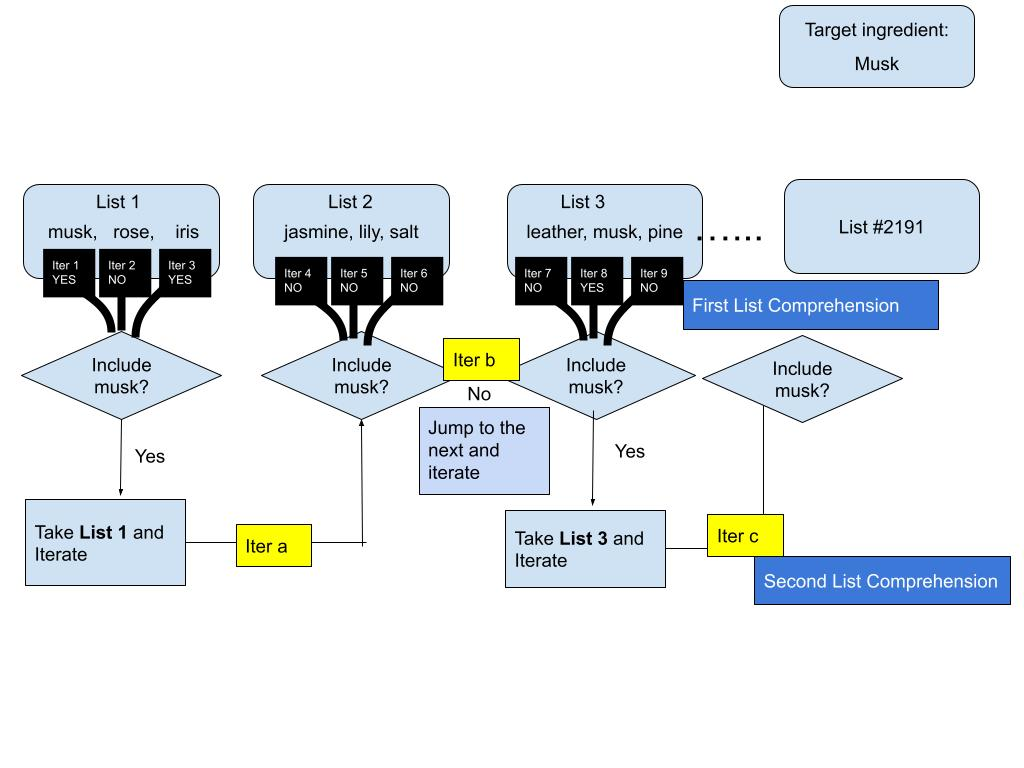

Finally we got a list pulled from the list comprehension, it looks like this: 

In [ ]:
print(*RoseList[0:10], sep="\n")


[' Violet', 'champaca', 'rosewood', 'beeswax', 'frankincense', 'myrrh', 'coffee bean', 'rose', 'tobacco', 'hay', 'jasmine', 'leather', 'castoreum', 'hyrax', 'civet', 'musk', 'oud', 'turmeric', 'cumin']
[' Bergamot', 'pink pepper', 'raspberry', 'rose', 'red satin lipstick', 'tuberose', 'cardamom', 'iris', 'cocoa', 'sandalwood', 'amber']
[' Elemi', 'pink pepper', 'absinthe', 'olibanum', 'rose', 'Indian tuberose absolut', 'geranium', 'labdanum', 'patchouli', 'tonka and amber']
[' clove', 'ash', 'sage', 'black pepper', 'labdanum', 'incense', 'rose', 'patchouli', 'leather', 'ambergris and moss']
[' Bergamot', 'galbanum', 'birch leaf', 'pine', 'saffron', 'jasmine', 'fir balsam', 'rose', 'oakmoss', 'patchouli', 'musk', 'amber']
[' Orange', 'bergamot', 'petitgrain', 'artemisia', 'basil', 'bulgarian lavender', 'geranium', 'rose', 'carnation', 'tonka bean', 'patchouli', 'moss', 'musk', 'leather', 'tabacco', 'amber']
[' Bergamot', 'coriander', 'plum', 'coconut', 'strawberry', 'rose oxyde', 'Cumin

Then you flatten the varible with chain.from_iterable(). 


See [here](https://docs.python.org/3/library/itertools.html) for how to use it.
And just COUNT! Then transfer it to a dataframe for better readability! 


## Step 5: My Perfume!
Based on the data, you could already come up with your own formula! I picked the following ingredients.

Let’s call this one **Zesty White**!

**Zesty White**’s formula:


> ***Bergamot, Jasmine, Rose, Musk, Incense, Ylang-ylang, Tuberose, Pepper, Labdanum, Lily, Benzoin***


Let’s see if could find a similar formulation from other perfumer. Ah! I found one here:

Nocturnes de Caron Caron

https://www.fragrantica.com/perfume/Caron/Nocturnes-de-Caron-284.html

Top Notes: Aldehydes, Neroli, Tincture of Rose, Organge

Middle Notes: Ylang-ylang, Tuberose, Jasmine

Base Notes: Vetiver, Sandalwood, Musk

To be a certified perfumer, someone needs to finish a degree in chemistry and a 2-year of perfume school, then start apprenticeship for quite a a few years - there are only about 1,000 perfumer around the world! (source: https://fridaymagazine.ae/life-culture/ask-the-experts/how-to-become-a-perfumer-1.2305026, retrieved 11-06-2021) Think about how many perfumes there are in the market!

Try it yourself!!

# NLP & Emotion detection
Daniel Wang

6/20/2021

## Introduction
In the last few projects, I used panda  create reports based on word frequencies. We knew that in this database, the most popular ingredients are amber, musk, vanilla, sandalwood. Later on, I was trying to figure out how each notes are “paired” by using list comprehension. 

However, this data base has a richer corpus that are waiting to be explored, the “description” data base. Let’s first have a look on what a “description” in this data base looks alike:

In [ ]:
perfumeData_clean.loc[845]

Name                                    Woody Mood Eau de Parfum
Brand                                           Olfactive Studio
Description     With Woody Mood, perfumer Betrand Duchaufour ...
Notes           bergamot, ginger, clary sage, saffron, sequoi...
Image URL      https://static.luckyscent.com/images/products/...
Name: 845, dtype: object

The “description” contains at least 4 sets of important information:

The key ingredients composition. Key ingredients are a set of ingredients that makes the “note” of a perfume. This is exactly what we would like to gather from “make a palette” project. In this example, the wood, sage, rubbery black tea, cacao, and styrax are the key ingredients in this perfum.

The “notes” (namely the theme & topic) of a perfume. “Notes” are a way to address a sort of perfume which holds similar “key ingredients”. Just like we can categorize different articles into romantics, Si-Fi, or thriller, we can also categorize perfumes into white flower notes or citrus notes. In this example, Woody Mood Eau de Parfum is a Wood Notes Perfume. You can explore more in https://www.fragrantica.com/notes/!

The projection of perfume. “Projection” here means what the impression it leaves on people. For example, what images, memories, or sensations it can evoke. In our example, it is fantasies of fall – crisp air, sweet wood smoke, the crackle of leaves hitting the bonfire, compiling them into an autumnal essay that satisfies down to the bone.

The emotional value of perfume. Look at the following words: beautifully, radiant, perfect, satisfactory, no-brainier. It seems the reviewer is quite happy with this perfume.

## Step 1 : Prepare the data & LDA

This version is heavily dependent on Jordan Barber's Blog Post: [Latent Dirichlet Allocation (LDA) with Python](https://http://rstudio-pubs-static.s3.amazonaws.com/79360_850b2a69980c4488b1db95987a24867a.html)

First, what is LDA (Latent Dirichlet Allocation)? Basically you could think of that as iterative optimization of document-topic-word match. LDA will first randomly group documents as topics, and mash up all words to randomly fit them into topics, and compare it against the original documents to optimize the iteration process. It seems a total chaos to begin with and there seems to be endless combinations- but with iterative optimization, it is reachable. Although all far from original documents, the one with higher resemblance wins.

For a more technical explanation of LDA, refer to http://ethen8181.github.io/machine-learning/clustering_old/topic_model/LDA.html

In [ ]:
pip install stop-words

In [ ]:
import pandas as pd
import nltk
import numpy as np
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim

tokenizer = RegexpTokenizer(r'\w+')
en_stop = get_stop_words('en')

p_stemmer = PorterStemmer()


pd.set_option("display.max_rows", 20)
des = perfumeData_clean["Description"].str.split('.').apply(pd.Series,1).stack()
des.index = des.index.droplevel(-2)
des.replace('', np.nan, inplace=True)
des.dropna(inplace=True)
print(type(des))
des_lst = des.tolist()
des_lst

tok = []

for i in des_lst:
  raw = i.lower()
  tokens = tokenizer.tokenize(raw)
  stopped_tokens = [i for i in tokens if not i in en_stop]
  stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
  tok.append(stemmed_tokens)

dictionary = corpora.Dictionary(tok)
corpus = [dictionary.doc2bow(text) for text in tok]

ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=8, id2word = dictionary, passes=20)

lda_topic = print(ldamodel.print_topics(num_topics=8, num_words=20)) 



<class 'pandas.core.series.Series'>
[(0, '0.033*"s" + 0.022*"fragranc" + 0.018*"one" + 0.015*"t" + 0.014*"scent" + 0.011*"perfum" + 0.010*"like" + 0.009*"wear" + 0.009*"can" + 0.008*"love" + 0.008*"just" + 0.008*"make" + 0.007*"smell" + 0.007*"re" + 0.006*"perfect" + 0.005*"beauti" + 0.005*"want" + 0.005*"think" + 0.005*"bottl" + 0.005*"oud"'), (1, '0.016*"like" + 0.012*"s" + 0.010*"smell" + 0.010*"skin" + 0.009*"love" + 0.008*"us" + 0.006*"dream" + 0.006*"end" + 0.006*"light" + 0.005*"night" + 0.005*"flower" + 0.005*"away" + 0.005*"mysteri" + 0.004*"dark" + 0.004*"inspir" + 0.004*"even" + 0.004*"never" + 0.004*"let" + 0.004*"island" + 0.004*"littl"'), (2, '0.016*"scent" + 0.012*"long" + 0.009*"sea" + 0.008*"s" + 0.007*"last" + 0.005*"fragranc" + 0.005*"us" + 0.005*"perfum" + 0.004*"salt" + 0.004*"noth" + 0.004*"name" + 0.004*"ocean" + 0.004*"natur" + 0.004*"oil" + 0.004*"year" + 0.003*"effect" + 0.003*"centuri" + 0.003*"equal" + 0.003*"day" + 0.003*"though"'), (3, '0.018*"sweet" + 0.0

In case you can't figure out what is being printed out (honestly me neither), I have sort them out and put it down below

>[(**0,**'0.017*"scent" + 0.011*"green" + 0.010*"like" + 0.008*"s" + 0.008*"fresh" + 0.007*"sun" + 0.006*"skin" + 0.006*"earth" + 0.006*"fig" + 0.005*"sens" + 0.005*"smell" + 0.005*"tree" + 0.005*"day" + 0.005*"sparkl" + 0.005*"light" + 0.005*"long" + 0.004*"feel" + 0.004*"keep" + 0.004*"can" + 0.004*"last"'),


>(**1,** '0.021*"note" + 0.017*"sweet" + 0.016*"rich" + 0.015*"vanilla" + 0.014*"floral" + 0.012*"wood" + 0.012*"base" + 0.012*"amber" + 0.012*"warm" + 0.011*"musk" + 0.011*"rose" + 0.010*"patchouli" + 0.010*"scent" + 0.010*"heart" + 0.010*"blend" + 0.009*"soft" + 0.008*"leather" + 0.008*"sandalwood" + 0.008*"spici" + 0.008*"spice"'), 


>(**2,** '0.020*"s" + 0.017*"fragranc" + 0.012*"eleg" + 0.011*"de" + 0.009*"modern" + 0.009*"classic" + 0.008*"scent" + 0.008*"perfum" + 0.007*"beauti" + 0.007*"eau" + 0.006*"parfum" + 0.006*"masculin" + 0.006*"power" + 0.006*"yet" + 0.006*"without" + 0.005*"man" + 0.005*"tri" + 0.005*"new" + 0.005*"sophist" + 0.005*"love"'), 


>(**3,**'0.017*"de" + 0.017*"rose" + 0.010*"flower" + 0.008*"beauti" + 0.006*"l" + 0.006*"perfum" + 0.006*"eau" + 0.006*"gardenia" + 0.006*"white" + 0.005*"re" + 0.005*"fragranc" + 0.004*"la" + 0.004*"garden" + 0.004*"oil" + 0.004*"essenti" + 0.004*"pure" + 0.004*"support" + 0.004*"simpl" + 0.004*"use" + 0.004*"hand"'),


>(**4,** '0.019*"like" + 0.010*"us" + 0.008*"s" + 0.007*"dark" + 0.006*"mysteri" + 0.005*"forest" + 0.005*"wind" + 0.005*"light" + 0.005*"ancient" + 0.005*"air" + 0.005*"smoke" + 0.005*"night" + 0.005*"away" + 0.005*"sun" + 0.004*"queen" + 0.004*"incens" + 0.004*"desert" + 0.004*"burn" + 0.004*"sky" + 0.004*"remind"'),


>(**5,** '0.022*"open" + 0.022*"fresh" + 0.020*"note" + 0.017*"orang" + 0.016*"green" + 0.012*"bergamot" + 0.012*"citru" + 0.011*"blossom" + 0.010*"sweet" + 0.010*"jasmin" + 0.009*"flower" + 0.009*"bright" + 0.008*"lemon" + 0.008*"top" + 0.008*"pepper" + 0.007*"like" + 0.007*"cool" + 0.007*"juici" + 0.006*"burst" + 0.006*"aromat"'),


>(**6,** '0.039*"s" + 0.016*"perfum" + 0.016*"fragranc" + 0.013*"one" + 0.010*"name" + 0.010*"oud" + 0.009*"inspir" + 0.009*"new" + 0.009*"scent" + 0.008*"creat" + 0.007*"world" + 0.007*"use" + 0.006*"uniqu" + 0.006*"collect" + 0.005*"natur" + 0.005*"bottl" + 0.005*"oil" + 0.005*"ingredi" + 0.005*"materi" + 0.005*"time"'), 


>(**7,** '0.022*"s" + 0.022*"scent" + 0.017*"t" + 0.016*"fragranc" + 0.013*"one" + 0.013*"smell" + 0.012*"make" + 0.011*"just" + 0.011*"like" + 0.010*"can" + 0.010*"love" + 0.007*"wear" + 0.007*"will" + 0.006*"perfect" + 0.006*"re" + 0.006*"us" + 0.005*"ve" + 0.005*"yet" + 0.005*"never" + 0.005*"think"')]


Let's see what theme could we generate:

In [8]:
p = {"Notes": ["Green & Earth", "Sweet  &Amber & Musk","Perfumes for Men","Rose","Incense & Smoke", "Bergamont & Organge", "Oud", "Perfume's General Emotional Projection"], "Projections": ["Light, fresh, sparking, and sunny", "Warm, soft", "morden,powerful, elegant, musculin, sophisticated", "Beautiful, Garden, Pure", "Dark, Mysterious, Ancient, Night" , "Fresh, bright, juicy, cool", "Inspiring, unique, collect, world, time", "Smell great, wears perfectly"]}

Projection= pd.DataFrame(data = p) 

Projection


,Notes,Projections
0,Green & Earth,"Light, fresh, sparking, and sunny"
1,Sweet &Amber & Musk,"Warm, soft"
2,Perfumes for Men,"morden,powerful, elegant, musculin, sophisticated"
3,Rose,"Beautiful, Garden, Pure"
4,Incense & Smoke,"Dark, Mysterious, Ancient, Night"
5,Bergamont & Organge,"Fresh, bright, juicy, cool"
6,Oud,"Inspiring, unique, collect, world, time"
7,Perfume's General Emotional Projection,"Smell great, wears perfectly"


## Step 2: Emotional Dectection

Most of the perfume would **LOVE** to give to a positive emotional projection. (because they want you to buy it!) 

But emotions are something that are very personal and the same bottle of perfume might elicit completely different emotions on different people! While at the same time, some perfume houses walked another way around, such as ***Serge Lutens***, they literally named one of their perfumes **“The orphan”**, and it smells like ***“you are in a depressing purgatory”*** (Source: https://www.fragrantica.com/perfume/Serge-Lutens/L-orpheline-26214.html).

So I would like to do an emotional value detection on our data base to see what it looks like!

to be continued.......